In [1]:
import anndata as ad
import stream as st

adata = ad.read_loom("cd3_minus_subset_NK_cells_obj_sub.loom")

/opt/anaconda3/envs/stream1.0/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [51]:
st.set_workdir(adata,'./stream_result')
# cell_label.tsv is a two column tsv without header, first column is cell barcode, second column is annotation for each cell
st.add_cell_labels(adata, file_name='./cell_label.tsv')
# you can sepcify a color for each cell label as well. by specifying file_name.
st.add_cell_colors(adata, file_name= './label_color.tsv')
adata.obsm['top_pcs'] = adata.obsm['pca_cell_embeddings']
adata.obsm['X_dr'] = adata.obsm['umap_cell_embeddings']
adata.obsm['X_vis_umap'] = adata.obsm['umap_cell_embeddings'][:,:2]


Saving results in: ./stream_result


In [3]:
adata.obsm['umap_cell_embeddings']
st.__version__

'1.0'

Importing precomputed umap visualization ...


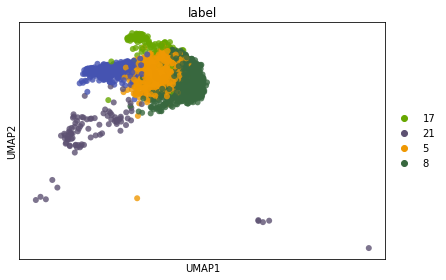

In [52]:
st.plot_visualization_2D(adata,method='umap',n_neighbors=50,color=['label'], use_precomputed=True)

In [53]:
adata.obsm

AxisArrays with keys: harmony_cell_embeddings, pca_cell_embeddings, umap_cell_embeddings, top_pcs, X_dr, X_vis_umap, X_vis, X_stream_S4, X_stream_S7

In [54]:
st.seed_elastic_principal_graph(adata,n_clusters= 5,use_vis= True)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 5
Calculatng minimum spanning tree...
Number of initial branches: 3


In [55]:
import numpy as np
np.random.seed(123)

In [56]:
st.elastic_principal_graph(adata,epg_alpha=0.02,epg_mu=0.05,epg_lambda=0.05)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 2000 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
5
 
6
 
7
 
8
 
9
 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||50
	
0.5674
	
50
	
49
	
42
	
3
	
0
	
0
	
0.3844
	
0.379
	
0.8897
	
0.8912
	
0.1755
	
0.007438
	
0.3719
	
18.59
	
0


7.062 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


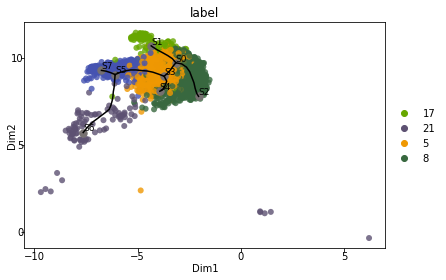

In [57]:
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True)

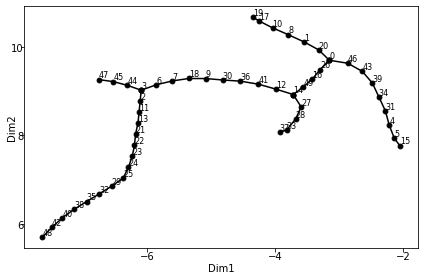

In [34]:
st.plot_branches(adata,show_text=True)

In [59]:
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True, save_fig = True)

In [73]:
st.plot_stream_sc(adata,root='S7',color=['label','FCGR3A','GZMB', 'GZMK', 'GZMH'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True)

In [71]:
st.plot_stream_sc(adata,root='S7',color=['PRF1'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 4)


In [76]:
st.plot_stream_sc(adata,root='S7',color=['GZMB'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 6.5)

In [77]:
st.plot_stream_sc(adata,root='S7',color=['FCGR3A'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 2.5)

In [78]:
st.plot_stream_sc(adata,root='S7',color=['GZMH'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 3)

In [79]:
st.plot_stream_sc(adata,root='S7',color=['GZMK'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 4)

In [80]:
st.plot_stream_sc(adata,root='S7',color=['KIR2DL3'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 1.25)

In [81]:
st.plot_stream_sc(adata,root='S7',color=['CCL3'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 8)

In [82]:
st.plot_stream_sc(adata,root='S7',color=['CCL4'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 12)

In [83]:
st.plot_stream_sc(adata,root='S7',color=['OASL'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 2)

In [84]:
st.plot_stream_sc(adata,root='S7',color=['IFIT3'],
                  show_graph=True,show_text=True, dist_scale= 0.1, save_fig = True, vmin = 0, vmax= 3)

In [65]:
st.plot_stream(adata,root='S7',color=['label','FCGR3A','PRF1', 'GZMB','GZMK', "GZMH","PRF1", 'KIR2DL3'], factor_num_win=5, save_fig = True)



In [66]:
st.plot_stream(adata,root='S7',color=['CCL3', 'CCL4', 'OASL', 'IFIT3'], factor_num_win=5 , save_fig = True)




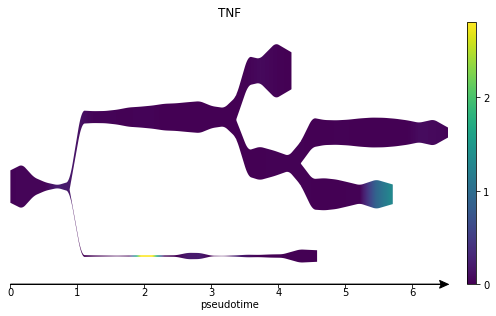

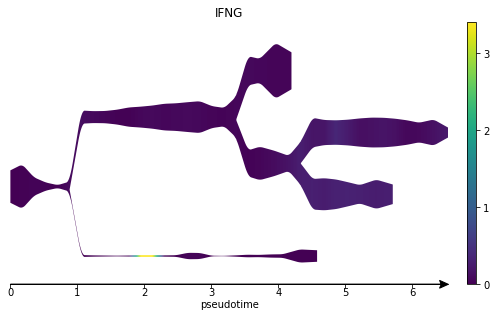

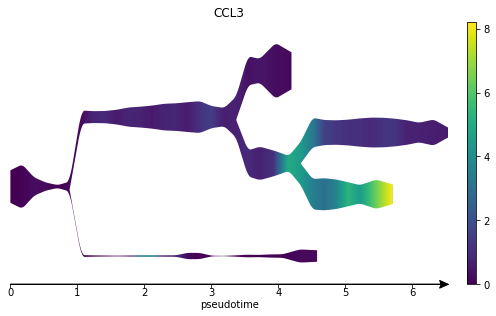

In [44]:
st.plot_stream(adata,root='S7',color=['TNF', 'IFNG', 'CCL3'], factor_num_win=5)

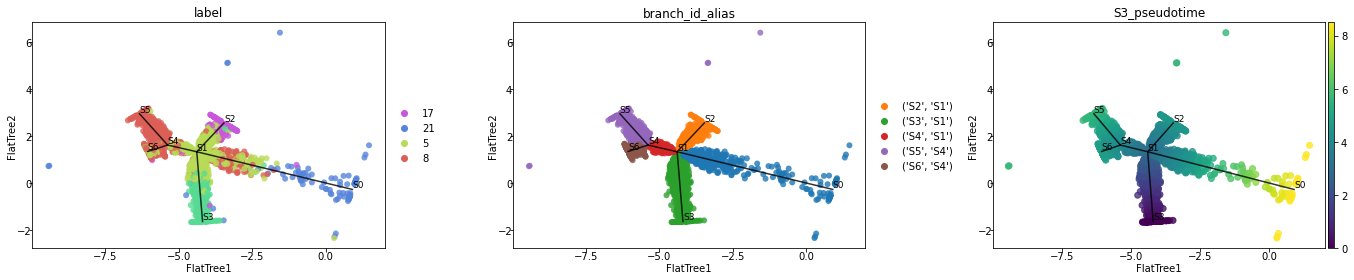

In [13]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S3_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

### detect marker genes at branch

In [15]:
adata.var

,Selected,vst_mean,vst_variable,vst_variance,vst_variance_expected,vst_variance_standardized
MIR1302-2HG,0.0,0.000019,0,0.000019,0.000020,0.965209
FAM138A,0.0,0.000000,0,0.000000,0.000000,0.000000
OR4F5,0.0,0.000000,0,0.000000,0.000000,0.000000
AL627309.1,0.0,0.000520,0,0.000520,0.000573,0.907270
AL627309.3,0.0,0.000004,0,0.000004,0.000004,0.999929
...,...,...,...,...,...,...
AC233755.2,1.0,0.002616,1,0.017407,0.003155,5.517430
AC233755.1,1.0,0.046100,1,48.705948,0.056577,11.072466
AC240274.1,0.0,0.006056,0,0.006399,0.007445,0.859565
AC213203.1,0.0,0.000000,0,0.000000,0.000000,0.000000


In [16]:
adata.X = adata.X.todense()
st.detect_leaf_markers(adata,marker_list=adata.var[adata.var['Selected']>0].index, cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S3',n_jobs=4)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...


/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/anndata/core/anndata.py:1239: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



4 cpus are being used ...
677 markers are being scanned ...


/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

In [17]:
adata.uns['leaf_markers_all'].sort_values(by = "S4S6_pvalue", ascending= True).head(n=10)

,zscore,H_statistic,H_pvalue,S3S1_pvalue,S4S6_pvalue,S4S5_pvalue,S1S0_pvalue,S1S2_pvalue
GZMK,1.99669,446.999,1.93435e-95,1,3.04458e-54,6.5113e-71,6.5113e-71,1.02338e-59
XCL1,1.95116,369.244,1.22574e-78,1,1.82206e-45,1.69781e-56,1.17536e-64,1.27049e-25
KIR2DL1,1.95458,341.862,1.00228e-72,6.50522e-70,2.8413e-28,1,1.3545e-51,5.3589e-56
KIR3DL1,1.94358,271.84,1.27992e-57,2.54986e-56,8.41564e-25,1,2.73917e-33,2.27556e-43
KIR2DL3,1.94392,260.413,3.71581e-55,1.87584e-53,4.71595e-24,1,1.29599e-32,1.57841e-41
COTL1,1.98247,166.325,6.42743e-35,1,2.25455e-20,2.50527e-27,2.50634e-19,2.14826e-17
CD3E,1.50533,149.381,2.76281e-31,1,2.70601e-19,3.36011e-17,0.000233962,5.7121e-21
IFIT3,1.99642,177.747,2.27153e-37,2.86825e-35,2.95051e-19,1.34396e-22,6.65828e-31,1
XCL2,1.67029,250.722,4.54972e-53,1,1.04741e-16,1.57319e-32,9.83201e-49,1.38375e-06
CD7,-1.77116,116.939,2.40639e-24,4.84284e-22,7.13086e-16,1.02136e-07,1,9.41487e-12


In [18]:
adata.uns['leaf_markers'][('S1','S2')].sort_values(by = "S1S2_pvalue", ascending= True).head()

,zscore,H_statistic,H_pvalue,S3S1_pvalue,S4S6_pvalue,S4S5_pvalue,S1S0_pvalue,S1S2_pvalue
IFIT3,1.99642,177.747,2.27153e-37,2.86825e-35,2.95051e-19,1.34396e-22,6.65828e-31,1
IFIT2,1.99849,156.823,7.01736e-33,3.86271e-28,2.96696e-15,1.63051e-23,6.98751e-29,1
CCL3L1,1.83012,131.795,1.60896e-27,8.42025e-22,0.00063311,1.0411e-15,4.1267e-23,1
PMAIP1,1.94497,120.401,4.38565e-25,2.54436e-12,1.80931e-05,2.24366e-18,3.95767e-24,1
OASL,1.98586,102.243,3.2745e-21,9.92811e-20,7.06546e-14,2.95289e-15,3.96149e-14,1


In [19]:
adata


AnnData object with n_obs × n_vars = 2000 × 33538 
    obs: 'ClusterID', 'ClusterName', 'RNA_snn_res_1_5', 'annotation', 'bms_subj_id', 'bor_by_irrc_may_2018', 'cd3_neg_cell_number', 'cd3_neg_viability_percent', 'cd3_plus_cell_number', 'cd3_plus_viability_percent', 'cd3_status', 'cohort', 'cohort2', 'date_processed', 'group', 'index', 'lane', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'pbmc_sample_id', 'percent_mt', 'pool_id', 'seurat_clusters', 'singleR_cluster', 'singleR_cluster_main', 'subject_id', 'tigl_id', 'treatment_cycle', 'type', 'label', 'kmeans', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S1_pseudotime', 'S3_pseudotime', 'S2_pseudotime', 'S6_pseudotime', 'S5_pseudotime', 'S4_pseudotime'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'workdir', 'label_color', 'params', 'epg', 'flat_tree', 'seed_epg', 'seed_flat_tree', 'ori_epg', 'epg_obj', 'ori_epg_obj'

#### detect marker genes that are differentially expressed between pairs of branches¶

In [20]:
st.detect_de_markers(adata,marker_list=adata.var[adata.var['Selected']>0].index,cutoff_zscore=1,cutoff_logfc=0.25,
                     root='S3',n_jobs=4, use_precomputed=False)


Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...


/Users/mtang/anaconda3/envs/stream/lib/python3.6/site-packages/anndata/core/anndata.py:1239: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



4 cpus are being used ...
677 markers are being scanned ...


In [22]:
adata.uns['de_markers_greater'].keys()

dict_keys([(('S3', 'S1'), ('S1', 'S4')), (('S3', 'S1'), ('S1', 'S0')), (('S3', 'S1'), ('S1', 'S2')), (('S1', 'S4'), ('S1', 'S0')), (('S1', 'S4'), ('S1', 'S2')), (('S1', 'S0'), ('S1', 'S2')), (('S1', 'S4'), ('S4', 'S6')), (('S1', 'S4'), ('S4', 'S5')), (('S4', 'S6'), ('S4', 'S5'))])

In [23]:
adata.uns['de_markers_less'].keys()

dict_keys([(('S3', 'S1'), ('S1', 'S4')), (('S3', 'S1'), ('S1', 'S0')), (('S3', 'S1'), ('S1', 'S2')), (('S1', 'S4'), ('S1', 'S0')), (('S1', 'S4'), ('S1', 'S2')), (('S1', 'S0'), ('S1', 'S2')), (('S1', 'S4'), ('S4', 'S6')), (('S1', 'S4'), ('S4', 'S5')), (('S4', 'S6'), ('S4', 'S5'))])